# Credit Card Fraud Detection Model

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


### Extract info 

At first we need to extract all information from the csv File and visualize the Data.


In [2]:
df=pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### Exploring Data

The Dataset include this Columns: 
- Time (raw data)
- 28 PCA Columns (Principal Component Analysis)  due to priviacy reason
- Amount (raw data)
- Class (0 for Non-Fraud and 1 for Fraud)

In [3]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


The Mean value for Amount it´s 88$ relative low.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

- There is no Nul values
- All Dtype are correct. Except Time and amount, this columns are not as a PCA

In [5]:
df["Class"].value_counts()

0    284315
1       492
Name: Class, dtype: int64

I´ts a High Unbalance DataSet
- 284315 are Non-Fraud (99.82)
- 492 are Fraud  (0.017%)

Text(0.5, 1.0, 'Class Distributions \n (0: No Fraud || 1: Fraud)')

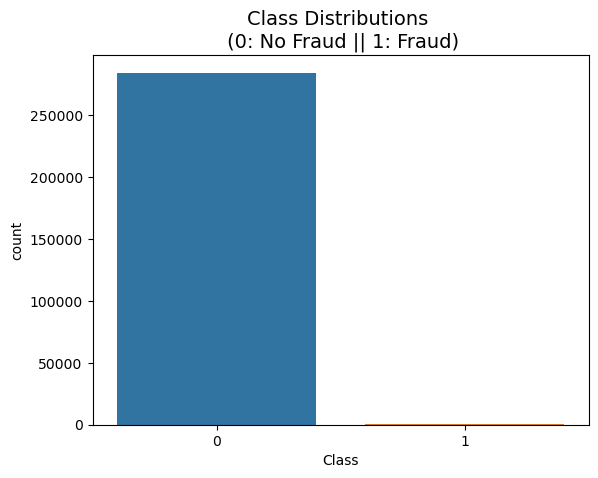

In [6]:
sns.countplot(data=df,x="Class" )
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)

Exploring distribution for the transaction Amount

C:\Users\migue\AppData\Local\Temp\ipykernel_10752\3697864109.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Amount"])


<Axes: xlabel='Amount', ylabel='Density'>

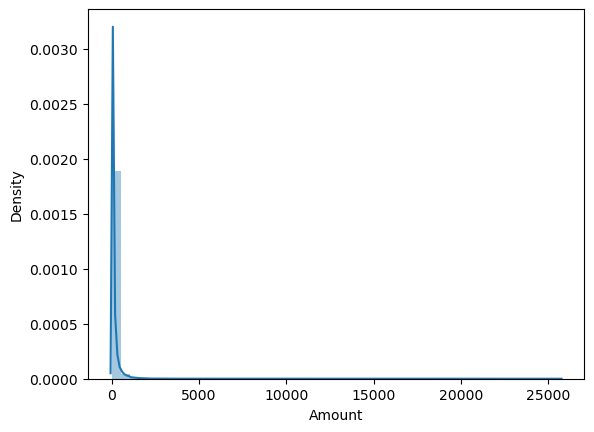

In [7]:
sns.distplot(df["Amount"])

For see Distribution for the transaction Time

C:\Users\migue\AppData\Local\Temp\ipykernel_10752\1101780921.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Time"])


<Axes: xlabel='Time', ylabel='Density'>

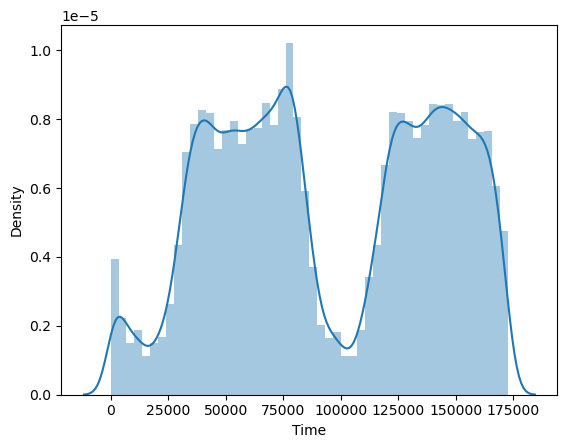

In [8]:
sns.distplot(df["Time"])

<Axes: >

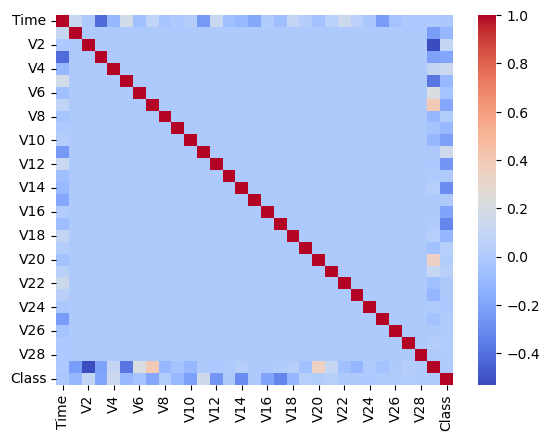

In [9]:
sns.heatmap(df.corr(),cmap='coolwarm')

Aas a result of the high unbalance there are a low correlation between the V's and the class (Non-Fraud, or Fraud). Also Variable Time and Amoung there are not as a PCA component.

### Transform

The columns Time and amount are not scaler as the otrer V's Columns.
To scaler this two variables:

In [10]:
#library to Scaler
from sklearn.preprocessing import RobustScaler

rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

In [11]:
df.drop(['Time','Amount'], axis=1, inplace=True)        ## Cleaning old Columns

In [12]:
df.head()         ## Visualize

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.783274,-0.994983
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.269825,-0.994983
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.983721,-0.994972
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.418291,-0.994972
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.670579,-0.994960


Splitting the Dataset with fraud and not fraud cases

In [13]:
df = df.sample(frac=1, random_state=101)             # Shuffle DF
fraud_df = df[df['Class'] == 1]                     # Take all fraud transaction (492)
non_fraud_df = df[df['Class'] == 0][:492]           # take first 492 transaction non-fraud

balanced_df = pd.concat([fraud_df, non_fraud_df])   #Concat fraud & Non-Fraud

new_df = balanced_df.sample(frac=1, random_state=41)# Shuffle the result

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
281600,-0.026787,-1.010903,-0.861896,-3.554438,1.671309,3.626510,-0.854974,0.870720,-1.899744,1.013607,...,0.359880,0.212428,0.682049,-1.103901,-0.344302,0.162067,0.266857,0,0.391253,1.005686
213706,1.961637,0.263526,-2.001729,0.876279,0.333942,-1.436033,0.400209,-0.377876,0.776825,-1.049773,...,-0.155701,0.036577,-0.104364,0.189040,-0.301624,0.014246,-0.002535,0,0.215189,0.642289
42756,-10.645800,5.918307,-11.671043,8.807369,-7.975501,-3.586806,-13.616797,6.428169,-7.368451,-12.888158,...,0.206809,-1.667801,0.558419,-0.027898,0.354254,0.273329,-0.152908,1,-0.307413,-0.510568
16863,-2.787248,-0.071340,-1.505288,3.361777,-3.357422,0.565835,0.303653,0.966914,-2.245882,-3.651427,...,-0.246202,1.752227,0.219925,0.156282,-0.265894,0.220694,0.256077,1,9.905121,-0.663189
201098,1.176633,3.141918,-6.140445,5.521821,1.768515,-1.727186,-0.932429,0.292797,-3.156827,-3.898240,...,-0.803021,-0.074098,-0.031084,0.375366,0.065897,0.488258,0.325872,1,-0.307413,0.576123


Text(0.5, 1.0, 'Equally Distributed Classes')

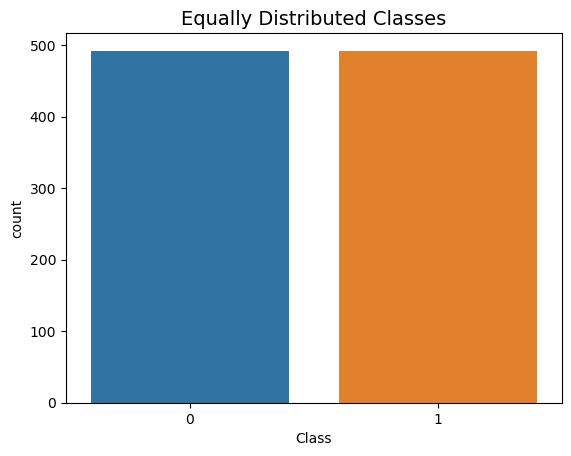

In [14]:
sns.countplot(data=new_df,x="Class")
plt.title('Equally Distributed Classes', fontsize=14)

The New DF are now balanced 50/50 percent with Fraud and Non-Fraud transactions.

The new correlation between class Column:


In [15]:
corr_new_df=new_df.corr()
corr_new_df['Class']

V1              -0.424934
V2               0.479385
V3              -0.557936
V4               0.705048
V5              -0.375057
V6              -0.394776
V7              -0.475749
V8               0.062481
V9              -0.559410
V10             -0.632503
V11              0.690018
V12             -0.685921
V13             -0.053187
V14             -0.747750
V15             -0.052721
V16             -0.594856
V17             -0.556930
V18             -0.465482
V19              0.271146
V20              0.167878
V21              0.139096
V22              0.020943
V23             -0.006002
V24             -0.139983
V25              0.029831
V26              0.083023
V27              0.074893
V28              0.038759
Class            1.000000
scaled_amount    0.084104
scaled_time     -0.174498
Name: Class, dtype: float64

Heat Correlation Map Between Columns.

<Axes: >

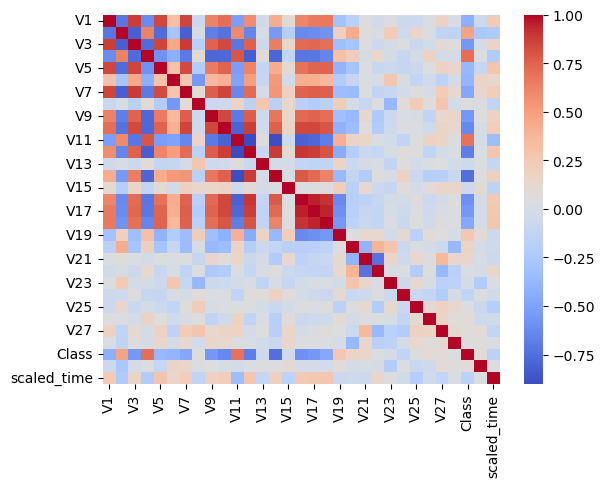

In [16]:
sns.heatmap(corr_new_df,cmap='coolwarm')

### Creating a predictive model using Logistic Regression

In [17]:
## Libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression


Split data for a Train and test Model

In [34]:
X=new_df.drop(['Class'],axis=1)
y=new_df['Class']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=101)

Training the model and Predict:

In [35]:
LR= LogisticRegression()
LR.fit(X_train,y_train)
predict=LR.predict(X_test)

Performance Metrics:

In [36]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       161
           1       0.96      0.96      0.96       135

    accuracy                           0.96       296
   macro avg       0.96      0.96      0.96       296
weighted avg       0.96      0.96      0.96       296



Confussion Matrix

In [37]:
print(confusion_matrix(y_test,predict))

[[156   5]
 [  6 129]]


- Upper Left Square: The amount of correctly classified by our model of no fraud transactions.
- Upper Right Square: The amount of incorrectly classified transactions as fraud cases, but the actual label is no fraud .
- Lower Left Square: The amount of incorrectly classified transactions as no fraud cases, but the actual label is fraud .
- Lower Right Square: The amount of correctly classified by our model of fraud transaction